**Lab 4 : Influence Model**
- Instuctor : Kijung Shin
- Teaching Assistants : Deukryeol Yoon(main), Hyunju Lee, Shinhwan Kang
- 본 실습에서는 정보 정파 모델 중 독립적 전파모델과 선형 임계치 모형 시뮬레이터에 대해서 알아본다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 실습에 필요한 library를 import하고 그래프 및 변수를를 초기화합니다.
import networkx as nx
import matplotlib.pyplot as plt
import random

import os
import os.path as osp

G = nx.DiGraph()  

# 절대 경로로 대체 가능                                                                                            
data = osp.abspath(osp.join(os.getcwd(), 'drive/MyDrive/data/lab/lab4/simple_weighted_directed_graph.txt'))    
f = open(data)
for line in f:
    line_split = line.split()
    # 정점의 식별자는 정수
    # 가중치는 확률값으로 실수
    src = int(line_split[0])  # 간선이 나가는 정점
    dst = int(line_split[1])  # 간선이 들어오는 정점
    w = float(line_split[2])  # 그 간선에 부여된 가중치 의미
    G.add_edge(src, dst, weight=w)

In [5]:
# 독립적 전파 모델이 전파되는 과정을 draw하는 함수입니다.

def draw(G: nx.Graph, affected: set(), used: set()) -> None:
    pos = {
            0:[0.5, 0.8], 1: [0.1, 0.5], 2:[0.2, 0.2],
            3:[0.8, 0.7], 4: [0.7, 0.4], 5:[0.45, 0.45],
            6:[0.6, 0.1], 7:[0.9, 0.35], 8:[0.7, 0.1]
    }
    
    nodeColorList = []
    nodeList = []
    for i in range(len(G.nodes)):
        nodeList.append(i)
        if i in affected:
            nodeColorList = nodeColorList + ['red']
        else :
            nodeColorList = nodeColorList + ['blue']
    im = nx.draw_networkx_nodes(G, pos, nodelist = nodeList, node_color=nodeColorList, node_size=100)
    edgeList = []
    edgeColorList = []
    for edge in G.edges:
        edgeList.append(edge)
        if edge in used:
            edgeColorList = edgeColorList + ['red']
        else :
            edgeColorList = edgeColorList + ['blue']
    nx.draw_networkx_edges(G, pos, edgelist = edgeList, edge_color = edgeColorList)
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
    plt.show()


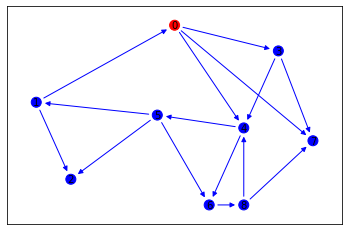

In [6]:
# 시드 집합, 즉 최초 전염자를 지정합니다
# 여기서는 0번 정점을 최초 전염자로 지정
# 감염자는 붉은색으로 표시

# 3개의 집합
# 감염자 저장
affected = set()                                                                # 그래프의 정점 중 시드 집합을 초기화 합니다.

# 새로운 감염자 저장
affected_new = set({0})

# 감염이 시도된 간선들의 집합
used_edge = set()                                                               # 전염을 시도한 간선들을 set으로 관리합니다. (그림을 그릴 때 사용)
draw(G, affected | affected_new, used_edge)                                     # 그래프의 초기 상태를 그립니다. 빨간색 : 감염된 정점 및 간선, 파란색 : 감염되지 않은 정점 및 간선

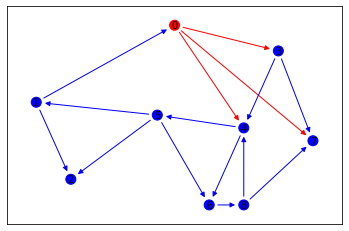

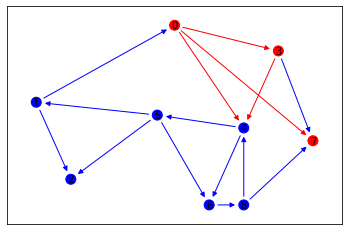

In [7]:
# 독립적 전파 모형을 시뮬레이션 합니다.
while len(affected_new) != 0:  # 종료 조건 : 새로운 감염자가 없는 경우
    temp = set()  # 이번 iter에서 새롭게 감염되는 감염자들
    for src in affected_new:
        neighbors = G.neighbors(src)  # src로부터의 전파 시도
        for dst in neighbors:
            if (dst not in affected) and (dst not in affected_new):
                p = random.uniform(0, 1)  # 0과 1 사이의 값을 균일 분포로부터 샘플링해 p에 저장
                
                # p가 G.edges[src, dst]["weight"]보다 작을 확률은
                # Psrc,dst와 동일
                if p < G.edges[src, dst]["weight"]:  # Psrc,dst
                    temp.add(dst)  # 감염
                # used_edge : 감염 시도한 edges
                used_edge.add((src, dst))
    
    # affected_new : 이전 iter에서 감염된 새로운 감염자는 더 이상 새로운 감염자 아니다
    # affected 집합에 합쳐준다
    affected = affected | affected_new  # 합집합
    affected_new = temp  # 이번 iter에서 새롭게 감염된 정점들의 집합 temp가 affected_new에 추가
    draw(G, affected, used_edge)  # 매 단계의 결과를 그림으로 출력

In [8]:
#선형 임계치 모형 시뮬레이터 

# 실습에 사용할 방향성이 없고 가중치도 없는 그래프를 읽어 불러옵니다.
G = nx.Graph()                                                                                              
data = osp.abspath(osp.join(os.getcwd(), 'drive/MyDrive/data/lab/lab4/simple_undirected_graph.txt'))     
f = open(data)
for line in f:
    line_split = line.split()
    src = int(line_split[0])
    dst = int(line_split[1])
    G.add_edge(src, dst)

In [9]:
# 선형 임계치 모형이 전파되는 과정을 그리는 함수입니다.
# networkx graph와 감염된 정점 리스트(affected)를 받아서 그림을 그립니다.
# 생략하고 넘어가셔도 좋습니다.

def draw(G: nx.Graph, affected: set()) -> None:
    pos = {
            0:[0.5, 0.8], 1: [1, 0.85], 2:[1.2, 0.9],
            3:[0.3, 0.6], 4: [0.7, 0.6], 5:[1.3, 0.6],
            6:[1.5, 0.7], 7:[0.6, 0.2], 8:[1.2, 0.3],
            9:[1, 0.1], 10:[0.4, 0.1]
    }
    
    nodeColorList = []
    nodeList = []
    for i in range(len(G.nodes)):
        nodeList.append(i)
        if i in affected:
            nodeColorList = nodeColorList + ['red']
        else :
            nodeColorList = nodeColorList + ['blue']
    im = nx.draw_networkx_nodes(G, pos, nodelist = nodeList, node_color=nodeColorList, node_size=100)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
    plt.show()

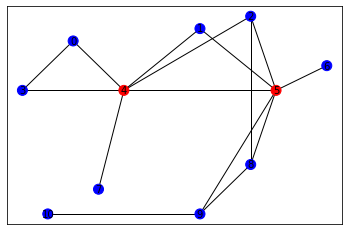

In [10]:
# 시드 집합, 즉 얼리 어답터를 지정합니다.
team_A = set({4, 5})  # 얼리 어답터, team_A는 A를 선택한 정점들의 집합                                                                                                              
team_B = set([v for v in G.nodes if v not in team_A])
draw(G, team_A)                                                                  

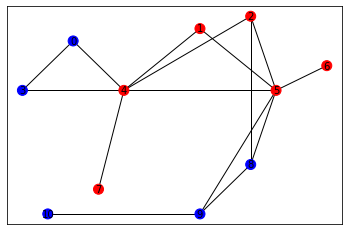

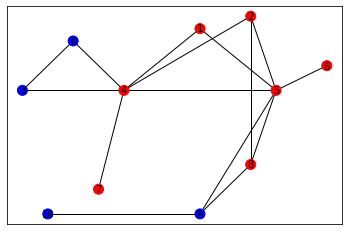

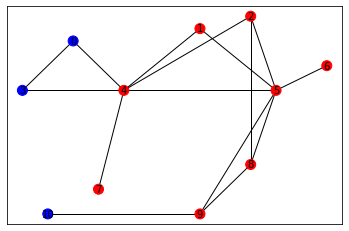

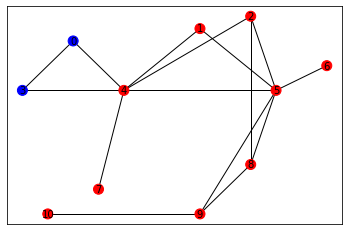

In [11]:
# 선형 임계치 모형을 시뮬레이션 합니다.
threshold = 0.5  # 임계치 q
while True:
    new_A = set()  # 이번 iter에서 새롭게 A를 선택한 정점들
    
    # 아직 A 선택하지 않은 정점들 순회
    for v in team_B:
        neighbors = list(G.neighbors(v))  # 정점 v의 이웃들의 목록
        neighbors_A = [v2 for v2 in neighbors if v2 in team_A]  # 이웃들 중 A 선택한 이웃들의 목록
        if len(neighbors_A) / len(neighbors) > threshold:  # 전체 v의 이웃들 중 A를 선택한 이웃의 비율 계산
            new_A.add(v)
    if len(new_A) == 0:  # 새롭게 A를 선택한 정점이 하나도 없으면 전파를 종료
        break

    # new_A : 이전 iter에서 새롭게 A를 선택한 정점, 더 이상 새롭게 A를 선택한 정점이 아니다
    # tema_A 집합에 합친다
    team_A = team_A | new_A  # 합집합

    # 새롭게 A를 선택한 정점은 더 이상 B를 선택하지 않게 때문에
    # team_B에서 제외
    team_B = team_B - new_A
    draw(G, team_A)